In [1]:
import os
import numpy as np
import torch
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

In [2]:
from xml.etree import ElementTree
import csv

In [3]:
# as some of the xml files contains -pc in the beginning while corresponding images does not contain -pc in its name
#so here the -pc is removed and stored in "files" while the name of xml files are stored in "annots"
path = "../desktop/objdet/XML"
files=[]
annots=[]
for i in os.listdir(path):
    annots.append(i)
    if(i[0]=="p"):
        i=i[3:]
    i=i[:-4]
    files.append(i)


In [4]:
#This function traverses through the xml file and then find the min and max, x and y coordinates
#It also returns the labels of the object along with the id
def xml_parser(address,width,height):
    dic = {'None': 0, 'bar': 1, 'caption': 2, 'credit': 3, 'drop-capital': 4, 'floating': 5, 'footer': 6, 'header': 7, 'heading': 8, 'line': 9, 'logo': 10, 'other': 11, 'page-number': 12, 'paragraph': 13, 'pie': 14, 'punch-hole': 15, 'signature': 16}
    path = "../desktop/objdet/XML"
    tree = ElementTree.parse(path+"/"+address)
    root = tree.getroot()
    ids=[]
    types=[]
    points=[]
    xandy=[]
    #img_width = width
    #img_height = height
    for i in root[1]: 
        for j in i:
            ids.append(i.attrib['id'])
            try:
                types.append(dic[i.attrib['type']])
            except:
                types.append(0)
            l=0
            for k in j:
                if(l==0):
                    x_min = int(k.attrib['x'])
                    x_max = int(k.attrib['x'])
                    y_min = int(k.attrib['y'])
                    y_max = int(k.attrib['y'])
                    l=l+1
                elif(l<4):
                    if(x_min>int(k.attrib['x'])):
                        x_min=int(k.attrib['x'])
                    if(x_max<int(k.attrib['x'])):
                        x_max=int(k.attrib['x'])
                    if(y_min>int(k.attrib['y'])):
                        y_min=int(k.attrib['y'])
                    if(y_max>int(k.attrib['y'])):
                        y_max=int(k.attrib['y'])
                    l+=1
            
            #xandy = [x_min/img_width,y_min/img_height,x_max/img_width,y_max/img_height]
            xandy = [x_min,y_min,x_max,y_max]
            points.append(xandy)
    return(points,ids,types)
        

In [5]:
roots = "../desktop/objdet"

In [8]:
import torch
from torch.utils.data import Dataset
import json
import os
from PIL import Image


class PascalVOCDataset(Dataset):
    """
    A PyTorch Dataset class to be used in a PyTorch DataLoader to create batches.
    """

    def __init__(self, roots, splits, keep_difficult=False):
        """
        :param data_folder: folder where data files are stored
        :param split: split, one of 'TRAIN' or 'TEST'
        :param keep_difficult: keep or discard objects that are considered difficult to detect?
        """
        self.splits = splits.upper()

        assert self.splits in {'TRAIN', 'TEST'}

        self.roots = roots
        self.keep_difficult = keep_difficult

        # Read data files
        self.images = self.roots+"/Images/"


    def __getitem__(self, i):
        # Read image
        image = Image.open(self.images+files[i]+".tif", mode='r')
        image = image.convert('RGB')

        # Read objects in this image (bounding boxes, labels, difficulties)
        boxes,ids,types = xml_parser(annots[i],image.size[0],image.size[1])
        boxes = torch.FloatTensor(boxes)  # (n_objects, 4)
        labels = torch.LongTensor(types)  # (n_objects)
        difficulties = torch.ByteTensor(labels.shape)

        # Discard difficult objects, if desired

        # Apply transformations
        image, boxes, labels = transform(image, boxes, labels, splits=self.splits)

        return image, boxes, labels, difficulties

    def __len__(self):
        return len(self.images)

    def collate_fn(self, batch):
        """
        Since each image may have a different number of objects, we need a collate function (to be passed to the DataLoader).
        This describes how to combine these tensors of different sizes. We use lists.
        Note: this need not be defined in this Class, can be standalone.
        :param batch: an iterable of N sets from __getitem__()
        :return: a tensor of images, lists of varying-size tensors of bounding boxes, labels, and difficulties
        """

        images = list()
        boxes = list()
        labels = list()
        difficulties = list()

        for b in batch:
            images.append(b[0])
            boxes.append(b[1])
            labels.append(b[2])
            difficulties.append(b[3])

        images = torch.stack(images, dim=0)

        return images, boxes, labels, difficulties  # tensor (N, 3, 300, 300), 3 lists of N tensors each


Loaded base model.



/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))


Epoch: [0][0/4]	Batch Time 69.472 (69.472)	Data Time 24.347 (24.347)	Loss 23.9654 (23.9654)	
[0/4]	Batch Time 10.561 (10.561)	Loss 15.1591 (15.1591)	

 * LOSS - nan


Epochs since last improvement: 1



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 0
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [1][0/4]	Batch Time 75.703 (75.703)	Data Time 15.056 (15.056)	Loss 13.6088 (13.6088)	
[0/4]	Batch Time 10.846 (10.846)	Loss 11.5557 (11.5557)	

 * LOSS - 11.564


Epochs since last improvement: 2



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 1
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [2][0/4]	Batch Time 70.427 (70.427)	Data Time 42.036 (42.036)	Loss 11.5415 (11.5415)	
[0/4]	Batch Time 10.758 (10.758)	Loss 11.7020 (11.7020)	

 * LOSS - nan


Epochs since last improvement: 3



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 2
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [3][0/4]	Batch Time 85.431 (85.431)	Data Time 55.553 (55.553)	Loss 11.5461 (11.5461)	
[0/4]	Batch Time 10.342 (10.342)	Loss 11.3696 (11.3696)	

 * LOSS - nan


Epochs since last improvement: 4



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 3
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))
/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 3
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [4][0/4]	Batch Time 76.349 (76.349)	Data Time 24.973 (24.973)	Loss 11.3816 (11.3816)	
[0/4]	Batch Time 12.356 (12.356)	Loss 11.3335 (11.3335)	

 * LOSS - 11.320


Epochs since last improvement: 5

Epoch: [5][0/4]	Batch Time 69.488 (69.488)	Data Time 38.192 (38.192)	Loss 11.3271 (11.3271)	
[0/4]	Batch Time 10.504 (10.504)	Loss 11.2748 (11.2748)	

 * LOSS - 11.280

Epoch: [6][0/4]	Batch Time 73.454 (73.454)	Data Time 39.860 (39.860)	Loss 11.3048 (11.3048)	
[0/4]	Batch Time 10.958 (10.958)	Loss 11.2320 (11.2320)	

 * LOSS - 11.229

Epoch: [7][0/4]	Batch Time 79.031 (79.031)	Data Time 44.315 (44.315)	Loss 11.2339 (11.2339)	
[0/4]	Batch Time 10.524 (10.524)	Loss 11.1540 (11.1540)	

 * LOSS - 11.166



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 7
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [8][0/4]	Batch Time 52.982 (52.982)	Data Time 24.852 (24.852)	Loss 11.1543 (11.1543)	
[0/4]	Batch Time 10.264 (10.264)	Loss 11.1610 (11.1610)	

 * LOSS - 11.138

Epoch: [9][0/4]	Batch Time 67.591 (67.591)	Data Time 41.745 (41.745)	Loss 11.1453 (11.1453)	
[0/4]	Batch Time 10.314 (10.314)	Loss 11.0653 (11.0653)	

 * LOSS - 11.069

Epoch: [10][0/4]	Batch Time 98.031 (98.031)	Data Time 48.219 (48.219)	Loss 11.0726 (11.0726)	
[0/4]	Batch Time 10.439 (10.439)	Loss 11.0757 (11.0757)	

 * LOSS - 11.020



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 10
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [11][0/4]	Batch Time 89.911 (89.911)	Data Time 53.587 (53.587)	Loss 11.0369 (11.0369)	
[0/4]	Batch Time 10.176 (10.176)	Loss 11.0148 (11.0148)	

 * LOSS - 10.962

Epoch: [12][0/4]	Batch Time 97.517 (97.517)	Data Time 66.637 (66.637)	Loss 10.9602 (10.9602)	
[0/4]	Batch Time 10.420 (10.420)	Loss 10.9172 (10.9172)	

 * LOSS - nan


Epochs since last improvement: 1



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 12
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))
/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 12
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [13][0/4]	Batch Time 48.571 (48.571)	Data Time 21.869 (21.869)	Loss 10.9418 (10.9418)	
[0/4]	Batch Time 10.472 (10.472)	Loss 10.8539 (10.8539)	

 * LOSS - 10.802


Epochs since last improvement: 2

Epoch: [14][0/4]	Batch Time 58.554 (58.554)	Data Time 29.311 (29.311)	Loss 10.8600 (10.8600)	
[0/4]	Batch Time 10.328 (10.328)	Loss 10.6995 (10.6995)	

 * LOSS - nan


Epochs since last improvement: 3



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 14
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [15][0/4]	Batch Time 69.149 (69.149)	Data Time 30.292 (30.292)	Loss 10.7593 (10.7593)	
[0/4]	Batch Time 10.430 (10.430)	Loss 10.5712 (10.5712)	

 * LOSS - 10.623


Epochs since last improvement: 4

Epoch: [16][0/4]	Batch Time 69.722 (69.722)	Data Time 41.565 (41.565)	Loss 10.6763 (10.6763)	
[0/4]	Batch Time 11.062 (11.062)	Loss 10.4534 (10.4534)	

 * LOSS - nan


Epochs since last improvement: 5



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 16
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [17][0/4]	Batch Time 99.867 (99.867)	Data Time 68.499 (68.499)	Loss 10.4779 (10.4779)	
[0/4]	Batch Time 10.551 (10.551)	Loss 9.5447 (9.5447)	

 * LOSS - 9.680


Epochs since last improvement: 6

Epoch: [18][0/4]	Batch Time 87.650 (87.650)	Data Time 51.823 (51.823)	Loss 9.7840 (9.7840)	
[0/4]	Batch Time 10.507 (10.507)	Loss 13.4681 (13.4681)	

 * LOSS - 13.783


Epochs since last improvement: 7



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 18
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [19][0/4]	Batch Time 83.176 (83.176)	Data Time 52.811 (52.811)	Loss 10.1180 (10.1180)	
[0/4]	Batch Time 10.315 (10.315)	Loss 8.8659 (8.8659)	

 * LOSS - 8.794



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 19
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [20][0/4]	Batch Time 65.098 (65.098)	Data Time 39.126 (39.126)	Loss 9.4405 (9.4405)	
[0/4]	Batch Time 10.328 (10.328)	Loss 14.4018 (14.4018)	

 * LOSS - 14.908


Epochs since last improvement: 1

Epoch: [21][0/4]	Batch Time 82.340 (82.340)	Data Time 50.164 (50.164)	Loss 6.9030 (6.9030)	
[0/4]	Batch Time 10.325 (10.325)	Loss 6.9201 (6.9201)	

 * LOSS - 6.913

Epoch: [22][0/4]	Batch Time 72.935 (72.935)	Data Time 33.753 (33.753)	Loss 7.5668 (7.5668)	
[0/4]	Batch Time 10.452 (10.452)	Loss 33.1708 (33.1708)	

 * LOSS - nan


Epochs since last improvement: 1



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 22
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [23][0/4]	Batch Time 65.512 (65.512)	Data Time 39.718 (39.718)	Loss 42.5020 (42.5020)	
[0/4]	Batch Time 10.410 (10.410)	Loss 10.3590 (10.3590)	

 * LOSS - 10.410


Epochs since last improvement: 2



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 23
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [24][0/4]	Batch Time 51.309 (51.309)	Data Time 22.779 (22.779)	Loss 10.4820 (10.4820)	
[0/4]	Batch Time 10.423 (10.423)	Loss 10.3349 (10.3349)	

 * LOSS - 10.420


Epochs since last improvement: 3

Epoch: [25][0/4]	Batch Time 57.674 (57.674)	Data Time 25.842 (25.842)	Loss 10.4952 (10.4952)	
[0/4]	Batch Time 10.405 (10.405)	Loss 10.2708 (10.2708)	

 * LOSS - nan


Epochs since last improvement: 4



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 25
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))
/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 25
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [26][0/4]	Batch Time 74.394 (74.394)	Data Time 46.024 (46.024)	Loss 10.3057 (10.3057)	
[0/4]	Batch Time 10.295 (10.295)	Loss 10.1341 (10.1341)	

 * LOSS - 10.147


Epochs since last improvement: 5



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 26
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [27][0/4]	Batch Time 54.483 (54.483)	Data Time 27.324 (27.324)	Loss 10.1893 (10.1893)	
[0/4]	Batch Time 10.271 (10.271)	Loss 9.9525 (9.9525)	

 * LOSS - 9.993

Epoch: [28][0/4]	Batch Time 72.891 (72.891)	Data Time 39.292 (39.292)	Loss 9.9430 (9.9430)	
[0/4]	Batch Time 10.712 (10.712)	Loss 9.9281 (9.9281)	

 * LOSS - 9.880



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 28
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [29][0/4]	Batch Time 86.606 (86.606)	Data Time 49.056 (49.056)	Loss 9.7556 (9.7556)	
[0/4]	Batch Time 12.819 (12.819)	Loss 9.7700 (9.7700)	

 * LOSS - 9.742



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 29
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [30][0/4]	Batch Time 82.756 (82.756)	Data Time 31.227 (31.227)	Loss 9.7352 (9.7352)	
[0/4]	Batch Time 10.814 (10.814)	Loss 9.5679 (9.5679)	

 * LOSS - 9.577

Epoch: [31][0/4]	Batch Time 62.871 (62.871)	Data Time 30.206 (30.206)	Loss 9.5490 (9.5490)	
[0/4]	Batch Time 10.329 (10.329)	Loss 9.3386 (9.3386)	

 * LOSS - nan


Epochs since last improvement: 1



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 31
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))
/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 31
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [32][0/4]	Batch Time 71.255 (71.255)	Data Time 44.007 (44.007)	Loss 9.3720 (9.3720)	
[0/4]	Batch Time 10.273 (10.273)	Loss 9.1171 (9.1171)	

 * LOSS - 9.132


Epochs since last improvement: 2

Epoch: [33][0/4]	Batch Time 65.391 (65.391)	Data Time 25.036 (25.036)	Loss 9.1257 (9.1257)	
[0/4]	Batch Time 10.415 (10.415)	Loss 8.8594 (8.8594)	

 * LOSS - 8.832

Epoch: [34][0/4]	Batch Time 71.526 (71.526)	Data Time 45.696 (45.696)	Loss 8.8388 (8.8388)	
[0/4]	Batch Time 10.673 (10.673)	Loss 8.1856 (8.1856)	

 * LOSS - nan


Epochs since last improvement: 1



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 34
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [35][0/4]	Batch Time 88.590 (88.590)	Data Time 57.935 (57.935)	Loss 8.3077 (8.3077)	
[0/4]	Batch Time 10.292 (10.292)	Loss 5.7504 (5.7504)	

 * LOSS - 5.456


Epochs since last improvement: 2



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 35
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [36][0/4]	Batch Time 85.830 (85.830)	Data Time 47.877 (47.877)	Loss 6.5374 (6.5374)	
[0/4]	Batch Time 10.673 (10.673)	Loss 12.7725 (12.7725)	

 * LOSS - 9.004


Epochs since last improvement: 3

Epoch: [37][0/4]	Batch Time 62.375 (62.375)	Data Time 28.920 (28.920)	Loss 6.7666 (6.7666)	
[0/4]	Batch Time 10.593 (10.593)	Loss 3.1518 (3.1518)	

 * LOSS - nan


Epochs since last improvement: 4



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss val' at x-index 37
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [38][0/4]	Batch Time 101.367 (101.367)	Data Time 70.630 (70.630)	Loss 3.9010 (3.9010)	
[0/4]	Batch Time 10.259 (10.259)	Loss 45.0406 (45.0406)	

 * LOSS - 28.879


Epochs since last improvement: 5



/Users/mahakkothari/Desktop/laplotter.py:56: UserWarning: Got NaN for value 'loss train' at x-index 38
  warnings.warn("Got NaN for value '%s' at x-index %d" % (label, x_index))


Epoch: [39][0/4]	Batch Time 77.048 (77.048)	Data Time 47.260 (47.260)	Loss 21.2728 (21.2728)	
[0/4]	Batch Time 10.575 (10.575)	Loss 8.7255 (8.7255)	

 * LOSS - 8.751



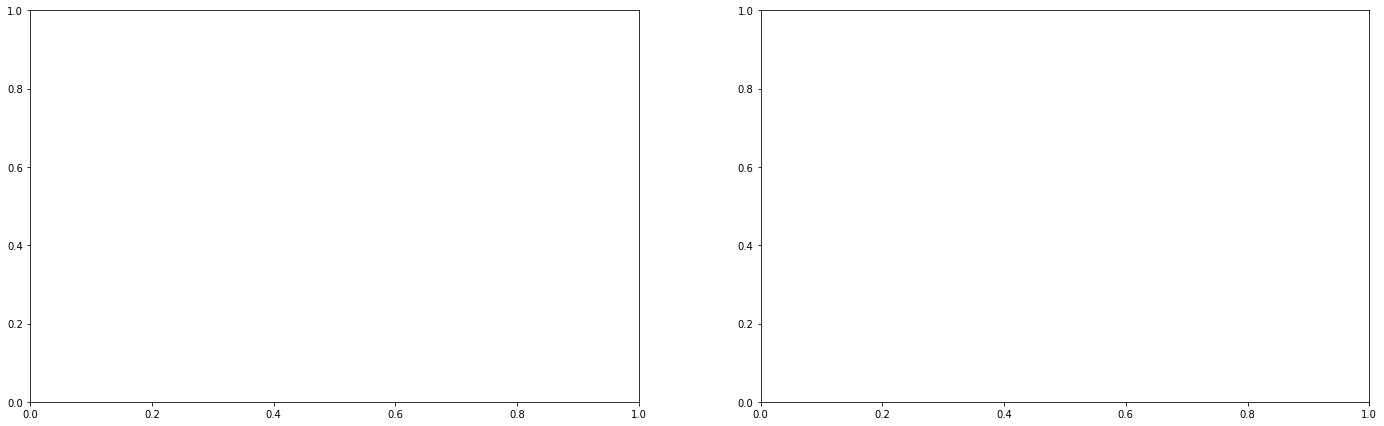

TypeError: 'odict_keys' object does not support indexing

<Figure size 432x288 with 0 Axes>

In [9]:
import time
import torch.backends.cudnn as cudnn
import torch.optim
import torch.utils.data
from model import SSD300, MultiBoxLoss
from utils import *
from laplotter import LossAccPlotter

# Data parameters
data_folder = roots  # folder with data files
keep_difficult = False  # use objects considered difficult to detect?

# Model parameters
# Not too many here since the SSD300 has a very specific structure
n_classes = 17  # number of different types of objects
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Learning parameters
checkpoint = None  # path to model checkpoint, None if none
batch_size = 8  # batch size
start_epoch = 0  # start at this epoch
epochs = 40  # number of epochs to run without early-stopping
epochs_since_improvement = 0  # number of epochs since there was an improvement in the validation metric
best_loss = 100.  # assume a high loss at first
workers = 4  # number of workers for loading data in the DataLoader
print_freq = 200  # print training or validation status every __ batches
lr = 1e-3  # learning rate
momentum = 0.9  # momentum
weight_decay = 5e-4  # weight decay
grad_clip = None  # clip if gradients are exploding, which may happen at larger batch sizes (sometimes at 32) - you will recognize it by a sorting error in the MuliBox loss calculation

cudnn.benchmark = True


def main():
    """
    Training and validation.
    """
    global epochs_since_improvement, start_epoch, label_map, best_loss, epoch, checkpoint

    # Initialize model or load checkpoint
    if checkpoint is None:
        model = SSD300(n_classes=n_classes)
        # Initialize the optimizer, with twice the default learning rate for biases, as in the original Caffe repo
        biases = list()
        not_biases = list()
        for param_name, param in model.named_parameters():
            if param.requires_grad:
                if param_name.endswith('.bias'):
                    biases.append(param)
                else:
                    not_biases.append(param)
        optimizer = torch.optim.SGD(params=[{'params': biases, 'lr': 2 * lr}, {'params': not_biases}],
                                    lr=lr, momentum=momentum, weight_decay=weight_decay)

    else:
        checkpoint = torch.load(checkpoint)
        start_epoch = checkpoint['epoch'] + 1
        epochs_since_improvement = checkpoint['epochs_since_improvement']
        best_loss = checkpoint['best_loss']
        print('\nLoaded checkpoint from epoch %d. Best loss so far is %.3f.\n' % (start_epoch, best_loss))
        model = checkpoint['model']
        optimizer = checkpoint['optimizer']

    # Move to default device
    model = model.to(device)
    criterion = MultiBoxLoss(priors_cxcy=model.priors_cxcy).to(device)

    # Custom dataloaders
    train_dataset = PascalVOCDataset(data_folder,
                                     splits='train',
                                     keep_difficult=keep_difficult)
    val_dataset = PascalVOCDataset(data_folder,
                                   splits='test',
                                   keep_difficult=keep_difficult)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True,
                                               collate_fn=train_dataset.collate_fn, num_workers=workers,
                                               pin_memory=True)  # note that we're passing the collate function here
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True,
                                             collate_fn=val_dataset.collate_fn, num_workers=workers,
                                             pin_memory=True)
    # Epochs
    running_loss = 0.0
    plotter = LossAccPlotter()
    for epoch in range(start_epoch, epochs):
        # Paper describes decaying the learning rate at the 80000th, 100000th, 120000th 'iteration', i.e. model update or batch
        # The paper uses a batch size of 32, which means there were about 517 iterations in an epoch
        # Therefore, to find the epochs to decay at, you could do,
        # if epoch in {80000 // 517, 100000 // 517, 120000 // 517}:
        #     adjust_learning_rate(optimizer, 0.1)

        # In practice, I just decayed the learning rate when loss stopped improving for long periods,
        # and I would resume from the last best checkpoint with the new learning rate,
        # since there's no point in resuming at the most recent and significantly worse checkpoint.
        # So, when you're ready to decay the learning rate, just set checkpoint = 'BEST_checkpoint_ssd300.pth.tar' above
        # and have adjust_learning_rate(optimizer, 0.1) BEFORE this 'for' loop

        # One epoch's training
        loss_train = train(train_loader=train_loader,
              model=model,
              criterion=criterion,
              optimizer=optimizer,
              epoch=epoch)

        # One epoch's validation
        val_loss = validate(val_loader=val_loader,
                            model=model,
                            criterion=criterion)

        # plot the last values
        plotter.add_values(epoch,loss_train=loss_train,
                               loss_val=val_loss,redraw = False)

        # As the plot is non-blocking, we should call plotter.block() at the end, to
        # change it to the blocking-mode. Otherwise the program would instantly end
        # and thereby close the plot.
        # Did validation loss improve?
        is_best = val_loss < best_loss
        best_loss = min(val_loss, best_loss)

        if not is_best:
            epochs_since_improvement += 1
            print("\nEpochs since last improvement: %d\n" % (epochs_since_improvement,))

        else:
            epochs_since_improvement = 0

        # Save checkpoint
        save_checkpoint(epoch, epochs_since_improvement, model, optimizer, val_loss, best_loss, is_best)

    plotter.redraw()
    plotter.block()
def train(train_loader, model, criterion, optimizer, epoch):
    """
    One epoch's training.
    :param train_loader: DataLoader for training data
    :param model: model
    :param criterion: MultiBox loss
    :param optimizer: optimizer
    :param epoch: epoch number
    """
    model.train()  # training mode enables dropout

    batch_time = AverageMeter()  # forward prop. + back prop. time
    data_time = AverageMeter()  # data loading time
    losses = AverageMeter()  # loss

    start = time.time()

    # Batches
    for i, (images, boxes, labels, _) in enumerate(train_loader):
        data_time.update(time.time() - start)

        # Move to default device
        images = images.to(device)  # (batch_size (N), 3, 300, 300)

        boxes = [b.to(device) for b in boxes]
        labels = [l.to(device) for l in labels]

        # Forward prop.
        predicted_locs, predicted_scores = model(images)  # (N, 8732, 4), (N, 8732, n_classes)
        # Loss
        loss = criterion(predicted_locs, predicted_scores, boxes, labels)  # scalar
        losses.update(loss.item(), images.size(0))
        # Backward prop.
        optimizer.zero_grad()
        loss.backward()

        # Clip gradients, if necessary
        if grad_clip is not None:
            clip_gradient(optimizer, grad_clip)

        # Update model
        optimizer.step()

        losses.update(loss.item(), images.size(0))
        batch_time.update(time.time() - start)

        start = time.time()

        # Print status
        if i % print_freq == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Batch Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Data Time {data_time.val:.3f} ({data_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(epoch, i, len(train_loader),
                                                                  batch_time=batch_time,
                                                                  data_time=data_time, loss=losses))
    return(losses.avg)
    del predicted_locs, predicted_scores, images, boxes, labels  # free some memory since their histories may be stored


def validate(val_loader, model, criterion):
    """
    One epoch's validation.
    :param val_loader: DataLoader for validation data
    :param model: model
    :param criterion: MultiBox loss
    :return: average validation loss
    """
    model.eval()  # eval mode disables dropout

    batch_time = AverageMeter()
    losses = AverageMeter()

    start = time.time()

    # Prohibit gradient computation explicity because I had some problems with memory
    with torch.no_grad():
        # Batches
        for i, (images, boxes, labels, difficulties) in enumerate(val_loader):

            # Move to default device
            images = images.to(device)  # (N, 3, 300, 300)
            boxes = [b.to(device) for b in boxes]
            labels = [l.to(device) for l in labels]

            # Forward prop.
            predicted_locs, predicted_scores = model(images)  # (N, 8732, 4), (N, 8732, n_classes)

            # Loss
            loss = criterion(predicted_locs, predicted_scores, boxes, labels)

            losses.update(loss.item(), images.size(0))
            batch_time.update(time.time() - start)

            start = time.time()

            # Print status
            if i % print_freq == 0:
                print('[{0}/{1}]\t'
                      'Batch Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                      'Loss {loss.val:.4f} ({loss.avg:.4f})\t'.format(i, len(val_loader),
                                                                      batch_time=batch_time,
                                                                      loss=losses))

    print('\n * LOSS - {loss.avg:.3f}\n'.format(loss=losses))

    return losses.avg



if __name__ == '__main__':
    main()